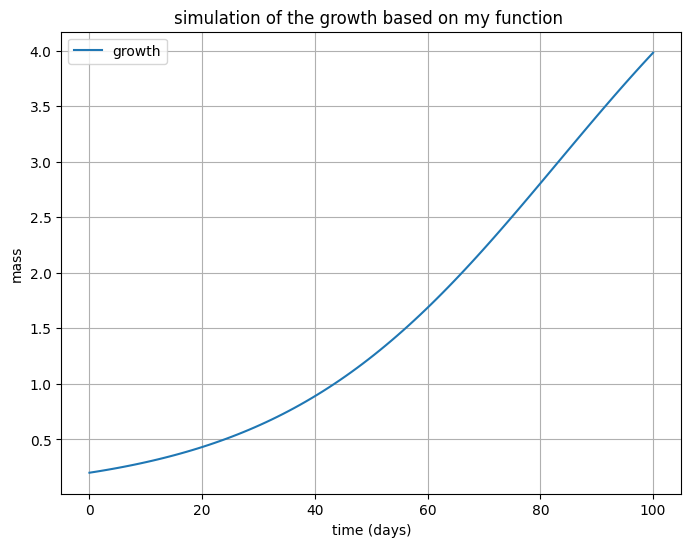

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# variables
Pmax = 1.0  # best photosynthetic
gamma_base = 1.0  # photosy in the best condiitons
rho_base = 0.01   # losses in the best conditions
epsilon = 0.7     # efficincy
Mmax = 6.0      # max mass
M0 = 0.2          # intial mass


def gamma(J, T):

    return gamma_base * (1 + 0.5 * np.sin(J)) * np.exp(-0.1 * (T - 20)**2)

def rho(J, T):

    return rho_base * (1 + 0.3 * np.cos(J)) * np.exp(-0.15 * (T - 22)**2)

# growth model without integral
def growth_model(M, t, J, T):


    gamma_value = gamma(J, T)
    rho_value = rho(J, T)
    phi = gamma_value - rho_value  # efficincy of photosynthetic

    dMdt = phi * epsilon * (Mmax - M) * M / Mmax
    return dMdt

# time (simulation )
t = np.linspace(0, 100, 100)

# default and make it constant
J = 10  # as signal to the light intensity
T = 25

# SOLVE ODE
M = odeint(growth_model, M0, t, args=(J, T))

plt.figure(figsize=(8,6))
plt.plot(t, M, label="growth")
plt.xlabel('time (days)')
plt.ylabel('mass')
plt.title('simulation of the growth based on my function ')
plt.legend()
plt.grid(True)
plt.show()


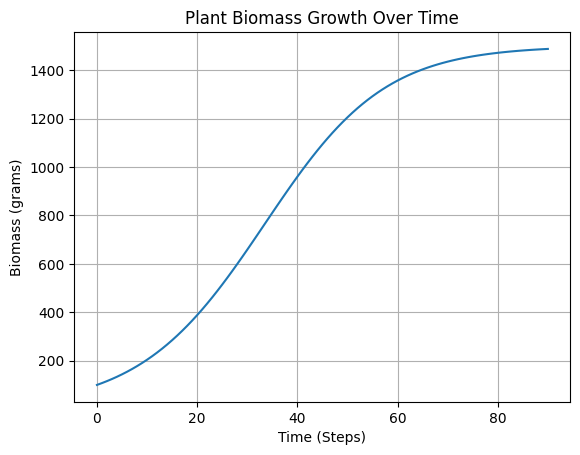

Biomass at time step 30: 658.3271972100205 grams


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
gamma_base = 1.0  # Photosynthesis rate constant (can be adjusted based on plant type)
rho_base = 0.1   # Respiration rate constant (can be adjusted based on plant type)
M_max_per_area = 1500  # Maximum biomass per square meter (grams per square meter)  #1400
area = 1         # Available area (square meters)
lux = 65000       # Light intensity (in lux)   # 65000
T = 25             # Temperature (in Celsius)
water_supply = 0.9  # Water supply level (from 0 to 1)

# Total maximum biomass for the entire area
M_max = M_max_per_area * area  # This considers the total biomass that can be supported by the entire area

# Function to calculate photosynthesis rate with constraints
def photosynthesis_rate(lux, T, water_supply):
    # Light effect on growth
    light_factor = (1 + 0.5 * np.sin(lux / 10000))

    # Temperature effect on photosynthesis
    temperature_factor = np.exp(-0.1 * (T - 20) ** 2)

    # Water effect on photosynthesis
    water_factor = water_supply

    # Calculate photosynthesis rate
    return gamma_base * light_factor * temperature_factor * water_factor

# Function to calculate respiration rate with constraints
def respiration_rate(lux, T):
    # ρ depends on lux and temperature
    return rho_base * (1 + 0.3 * np.cos(lux / 10000)) * np.exp(-0.15 * (T - 22) ** 2)

# Function to calculate plant growth rate with constraints
def plant_growth_rate(M, lux, T, water_supply):
    r = photosynthesis_rate(lux, T, water_supply)  # Photosynthesis rate
    respiration = respiration_rate(lux, T)          # Respiration rate

    # Logistic growth function with constraints
    growth_rate = (r * (M_max - M) * M / M_max )- respiration

    return growth_rate

# Function to calculate plant biomass at a given time
def calculate_plant_mass(M0, lux, T, water_supply, time_steps):
    M = M0
    biomass_over_time = [M]  # List to store biomass values at each time step

    for t in range(time_steps):
        # Update biomass over time
        growth_rate = plant_growth_rate(M, lux, T, water_supply)
        M += growth_rate  # Increase biomass according to growth rate

        # Apply constraints to biomass
        if M > M_max:  # If biomass exceeds maximum limit
            M = M_max
        if M < 0:  # If biomass is below zero (not possible)
            M = 0

        # Append the biomass value to the list for plotting
        biomass_over_time.append(M)

    return biomass_over_time

# Example calculation
M0 = 100  # Initial biomass of the plant (in grams)
time_steps = 90  # Number of time steps for growth simulation
biomass_data = calculate_plant_mass(M0, lux, T, water_supply, time_steps)

# Plotting the biomass over time
plt.plot(biomass_data)
plt.title("Plant Biomass Growth Over Time")
plt.xlabel("Time (Steps)")
plt.ylabel("Biomass (grams)")
plt.grid(True)
plt.show()

time_step_to_check = 30
print(f"Biomass at time step {time_step_to_check}: {biomass_data[time_step_to_check]} grams")

In [2]:
import random
POPULATION_SIZE = 100
GENOME_LENGTH = 20
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.7
GENERATIONS = 100

def random_genome(length):
    return [random.randint(0, 1) for _ in range(length)]

def random_population(population_size , genome_length):
    return [random_genome(genome_length) for _ in range(population_size)]

def fitness(genome):
    return sum(genome)

def select_parents(population,fitness_values):
    total_fitness = sum(fitness_values)
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual, fitness_val in zip(population, fitness_values):
        current += fitness_val
        if current > pick:
            return individual

def crossover(parent1, parent2):
  if random.random() < CROSSOVER_RATE:
    crossover_point = random.randint(1, len(parent1) - 1)
    return parent1[:crossover_point] + parent2[crossover_point:], parent2[:crossover_point] + parent1[crossover_point:]
  else:
    return parent1,parent2

def mutate(genome):
    for i in range(len(genome)):
        if random.random() < MUTATION_RATE:
            genome[i] = abs(genome[i]- 1)
    return genome


def genetic_algorithm():
    population = random_population(POPULATION_SIZE, GENOME_LENGTH)
    for generation in range(GENERATIONS):
        fitness_values = [fitness(genome) for genome in population]

        new_population = []
        for _ in range(POPULATION_SIZE//2):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    best_genome = max(population, key=fitness)
    print("Best genome found:", best_genome)
    print("Fitness of best genome:", fitness(best_genome))
    return best_genome

if __name__ == "__main__":
  genetic_algorithm()




Best genome found: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness of best genome: 20


Best genome found (lux, T, water_supply): [22006, 16.16934501006923, 0.8901239977717923]
Fitness of best genome: 1489.9980612539891


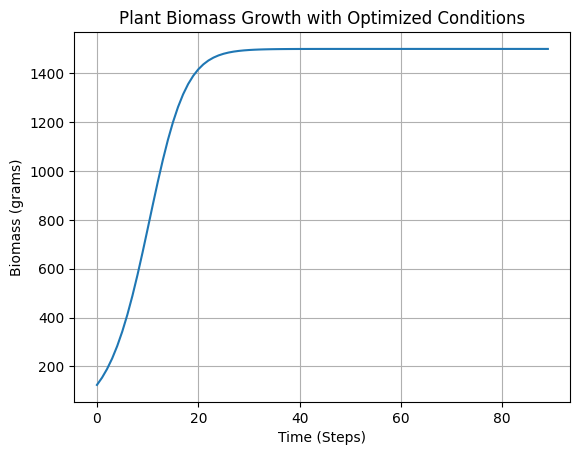

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
gamma_base = 0.9
rho_base = 0.1
M_max_per_area = 1500
area = 1
M_max = M_max_per_area * area

# Function to calculate photosynthesis rate
def photosynthesis_rate(lux, T, water_supply):
    light_factor = (1 + 0.5 * np.sin(lux / 10000))
    temperature_factor = np.exp(-0.1 * (T - 20) ** 2)
    water_factor = water_supply
    return gamma_base * light_factor * temperature_factor * water_factor

# Function to calculate respiration rate
def respiration_rate(lux, T):
    return rho_base * (1 + 0.3 * np.cos(lux / 10000)) * np.exp(-0.15 * (T - 22) ** 2)

# Function to calculate plant growth rate
def plant_growth_rate(M, lux, T, water_supply):
    r = photosynthesis_rate(lux, T, water_supply)
    respiration = respiration_rate(lux, T)
    growth_rate = (r * (M_max - M) * M / M_max) - respiration
    return growth_rate

# Fitness function for genetic algorithm
def fitness(genome):
    lux, T, water_supply = genome
    M = 10  # Initial biomass
    time_steps = 90
    total_growth = 0

    for t in range(time_steps):
        growth_rate = plant_growth_rate(M, lux, T, water_supply)
        M += growth_rate
        total_growth += growth_rate
        if M > M_max: M = M_max
        if M < 0: M = 0

    return total_growth

# Genetic Algorithm Parameters
POPULATION_SIZE = 100
GENOME_LENGTH = 3  # [lux, T, water_supply]
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.7
GENERATIONS = 100

# Generate random genome
def random_genome():
    lux = random.randint(5000, 30000)  # Light intensity
    T = random.uniform(10, 40)         # Temperature
    water_supply = random.uniform(0.3, 1.0)  # Water supply
    return [lux, T, water_supply]

# Generate random population
def random_population(population_size):
    return [random_genome() for _ in range(population_size)]

# Select parents
def select_parents(population, fitness_values):
    total_fitness = sum(fitness_values)
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual, fitness_val in zip(population, fitness_values):
        current += fitness_val
        if current > pick:
            return individual

# Crossover function
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        crossover_point = random.randint(0, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2
    else:
        return parent1, parent2

# Mutation function
def mutate(genome):
    for i in range(len(genome)):
        if random.random() < MUTATION_RATE:
            if i == 0:  # Mutate lux
                genome[i] = random.randint(5000, 30000)
            elif i == 1:  # Mutate temperature
                genome[i] = random.uniform(10, 40)
            elif i == 2:  # Mutate water_supply
                genome[i] = random.uniform(0.3, 1.0)
    return genome

# Genetic Algorithm
def genetic_algorithm():
    population = random_population(POPULATION_SIZE)
    for generation in range(GENERATIONS):
        fitness_values = [fitness(genome) for genome in population]
        new_population = []

        for _ in range(POPULATION_SIZE // 2):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    best_genome = max(population, key=fitness)
    best_fitness = fitness(best_genome)
    print("Best genome found (lux, T, water_supply):", best_genome)
    print("Fitness of best genome:", best_fitness)
    return best_genome

# Run the Genetic Algorithm
if __name__ == "__main__":
    best_conditions = genetic_algorithm()

    # Simulate and plot biomass growth for best conditions
    M0 = 100
    lux, T, water_supply = best_conditions
    time_steps = 90
    biomass_data = []
    M = M0

    for t in range(time_steps):
        growth_rate = plant_growth_rate(M, lux, T, water_supply)
        M += growth_rate
        if M > M_max: M = M_max
        if M < 0: M = 0
        biomass_data.append(M)

    plt.plot(biomass_data)
    plt.title("Plant Biomass Growth with Optimized Conditions")
    plt.xlabel("Time (Steps)")
    plt.ylabel("Biomass (grams)")
    plt.grid(True)
    plt.show()


Optimizing conditions for Germination...
r: 0.5481428320250907, respiration: 0.10462769454772973, growth_rate: 5.340257770234838
r: 0.5522017783403954, respiration: 0.11016872649801794, growth_rate: 5.375035605016576
r: 0.32743151862334735, respiration: 0.08215211882120747, growth_rate: 3.170334299504043
r: 0.656197186153276, respiration: 0.09219400959541126, growth_rate: 6.426031372860464
r: 0.8478526371854155, respiration: 0.07663794367995352, growth_rate: 8.345364919028508
r: 0.4842484136430114, respiration: 0.07628138503047806, growth_rate: 4.733919523823435
r: 0.27375544948744807, respiration: 0.058745248716929106, growth_rate: 2.660558882858388
r: 0.3551727202836016, respiration: 0.07874086216482298, growth_rate: 3.4493081593189525
r: 0.144775766873326, respiration: 0.049862025768268585, growth_rate: 1.3882439251734364
r: 0.7600719888571804, respiration: 0.11247878654188034, growth_rate: 7.437569636106112
r: 0.8703276193240764, respiration: 0.07662837216397612, growth_rate: 8.568

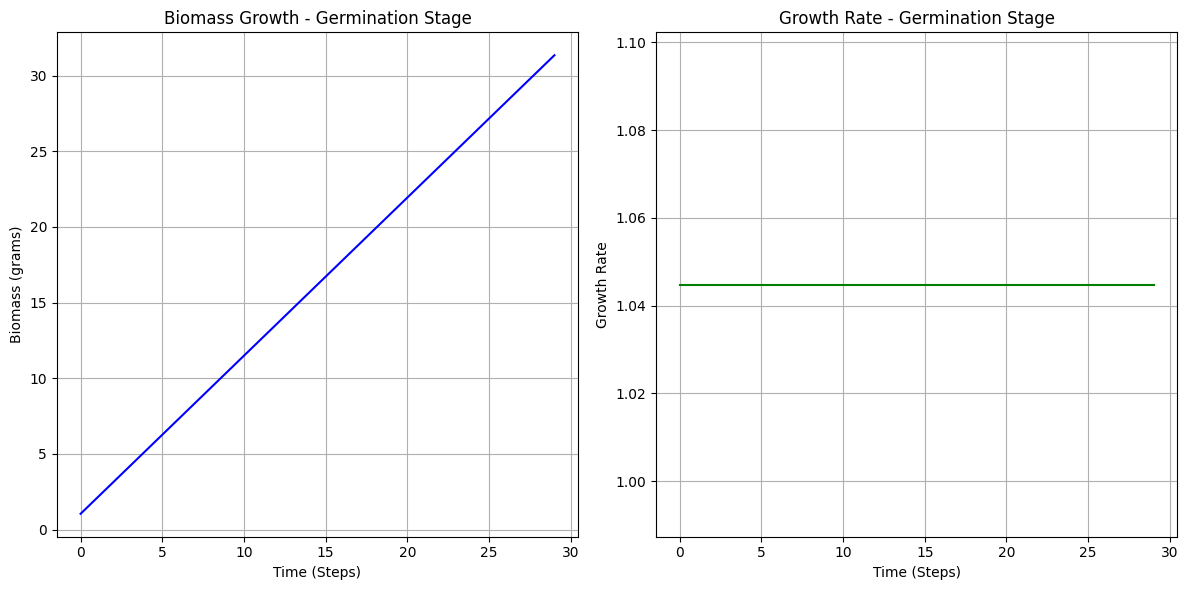

Final biomass at the end of Germination stage: 31.34 grams
Simulating growth for Vegetative stage...
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748064e-05, respiration: 1.6738706755706677e-05, growth_rate: 0.0006096127903959344
r: 6.305551984748

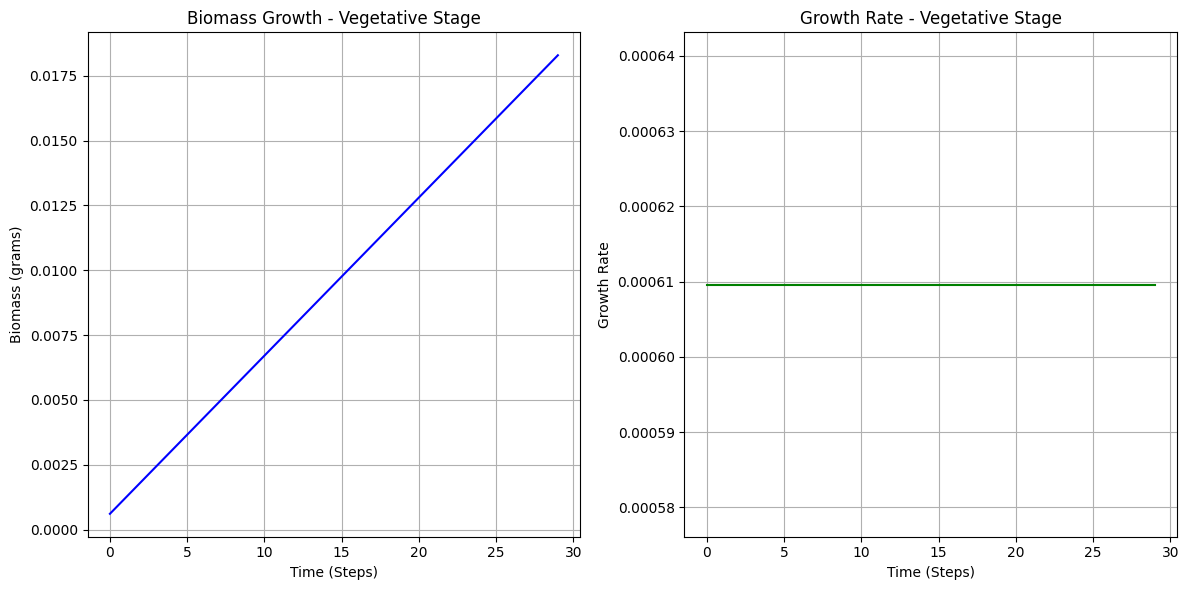

Final biomass at the end of Vegetative stage: 0.02 grams
Simulating growth for Flowering stage...
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration: 0.0019153389198380446, growth_rate: 0.018992394241385577
r: 0.0021048053518010357, respiration:

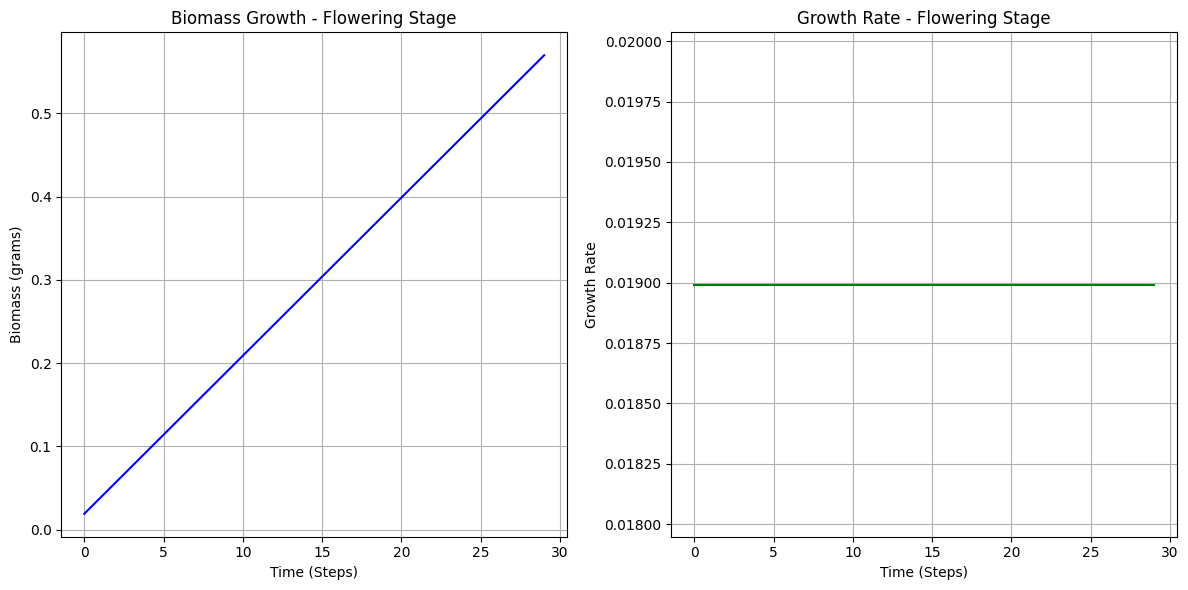

Final biomass at the end of Flowering stage: 0.57 grams


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
gamma_base = 0.9
rho_base = 0.1
M_max_per_area = 1500
area = 1
M_max = M_max_per_area * area
init_m = 10
# Genetic Algorithm Parameters
POPULATION_SIZE = 100
GENOME_LENGTH = 3  # [lux, T, water_supply]
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.7
GENERATIONS = 100

# Function to calculate photosynthesis rate
def photosynthesis_rate(lux, T, water_supply):
    light_factor = (1 + 0.5 * np.sin(lux / 10000))
    temperature_factor = np.exp(-0.1 * (T - 20) ** 2)
    water_factor = water_supply
    return gamma_base * light_factor * temperature_factor * water_factor

# Function to calculate respiration rate
def respiration_rate(lux, T):
    return rho_base * (1 + 0.3 * np.cos(lux / 10000)) * np.exp(-0.15 * (T - 22) ** 2)

# Function to calculate plant growth rate
def plant_growth_rate(M, lux, T, water_supply):
    r = photosynthesis_rate(lux, T, water_supply)
    respiration = respiration_rate(lux, T)
    growth_rate = (r * (M_max - M) * M / M_max) - respiration
    print(f"r: {r}, respiration: {respiration}, growth_rate: {growth_rate}")  # Debugging
    growth_rate = max(growth_rate, 0)  # Ensure growth rate doesn't go negative
    return growth_rate


stages = {
    "Germination": {"lux": (10000, 20000), "temp": (20, 25), "water": (0.6, 1.0)},
    "Vegetative": {"lux": (30000, 50000), "temp": (25, 30), "water": (0.3, 0.9)},
    "Flowering": {"lux": (40000, 60000), "temp": (22, 28), "water": (0.2, 0.7)},
}

def optimize_conditions(stage_name, stage_ranges):
    population_size = POPULATION_SIZE
    generations = GENERATIONS

    population = [
        {
            "lux": random.uniform(*stage_ranges["lux"]),
            "temp": random.uniform(*stage_ranges["temp"]),
            "water": random.uniform(*stage_ranges["water"]),
        }
        for _ in range(population_size)
    ]

    for generation in range(generations):
        fitness_scores = [
            plant_growth_rate(init_m ,individual["lux"], individual["temp"], individual["water"])
            for individual in population
        ]

        top_individuals = sorted(
            zip(population, fitness_scores), key=lambda x: x[1], reverse=True
        )[:population_size // 2]


          # crossover and mutation
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.choices(top_individuals, k=2)
            child = {}
        for key in ["lux", "temp", "water"]:
            if random.random() < 0.3:        # دى حساها غلط مينفعش
                child[key] = parent1[0][key]
            else:
                child[key] = parent2[0][key]

        mutation_probability = MUTATION_RATE
        if random.random() < mutation_probability:
            child["lux"] += random.uniform(0, 500)  # add noise to the lux
        if random.random() < mutation_probability:
            child["temp"] += random.uniform(0, 0.5)
        if random.random() < mutation_probability:
            child["water"] += random.uniform(0, 0.05)
            # sure it will stay in the constrains
        child["lux"] = max(stage_ranges["lux"][0], min(child["lux"], stage_ranges["lux"][1]))
        child["temp"] = max(stage_ranges["temp"][0], min(child["temp"], stage_ranges["temp"][1]))
        child["water"] = max(stage_ranges["water"][0], min(child["water"], stage_ranges["water"][1]))

        new_population.append(child)

        population = new_population

      # selection
    best_individual = max(population, key=lambda ind: plant_growth_rate(init_m ,ind["lux"], ind["temp"], ind["water"]))
    return best_individual

optimized_conditions = {}
for stage, ranges in stages.items():
    print(f"Optimizing conditions for {stage}...")
    optimized_conditions[stage] = optimize_conditions(stage, ranges)

for stage, conditions in optimized_conditions.items():
    print(f"Optimal conditions for {stage}: {conditions}")

# Simulate and plot biomass growth and growth rate for best conditions
for stage, conditions in optimized_conditions.items():
    print(f"Simulating growth for {stage} stage...")

    time_steps = 30
    biomass_data = []
    growth_rate_data = []
    M = 0  # Initialize mass for the stage

    for t in range(time_steps):
        growth_rate = plant_growth_rate(init_m, conditions["lux"], conditions["temp"], conditions["water"])
        M += growth_rate
        if M > M_max:
            M = M_max
        if M < 0:
            M = 0

        biomass_data.append(M)
        growth_rate_data.append(growth_rate)

    # Plot biomass and growth rate
    plt.figure(figsize=(12, 6))

    # Biomass plot
    plt.subplot(1, 2, 1)
    plt.plot(range(time_steps), biomass_data, label="Biomass", color="blue")
    plt.title(f"Biomass Growth - {stage} Stage")
    plt.xlabel("Time (Steps)")
    plt.ylabel("Biomass (grams)")
    plt.grid(True)

    # Growth rate plot
    plt.subplot(1, 2, 2)
    plt.plot(range(time_steps), growth_rate_data, label="Growth Rate", color="green")
    plt.title(f"Growth Rate - {stage} Stage")
    plt.xlabel("Time (Steps)")
    plt.ylabel("Growth Rate")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final mass at the end of the stage
    print(f"Final biomass at the end of {stage} stage: {M:.2f} grams")


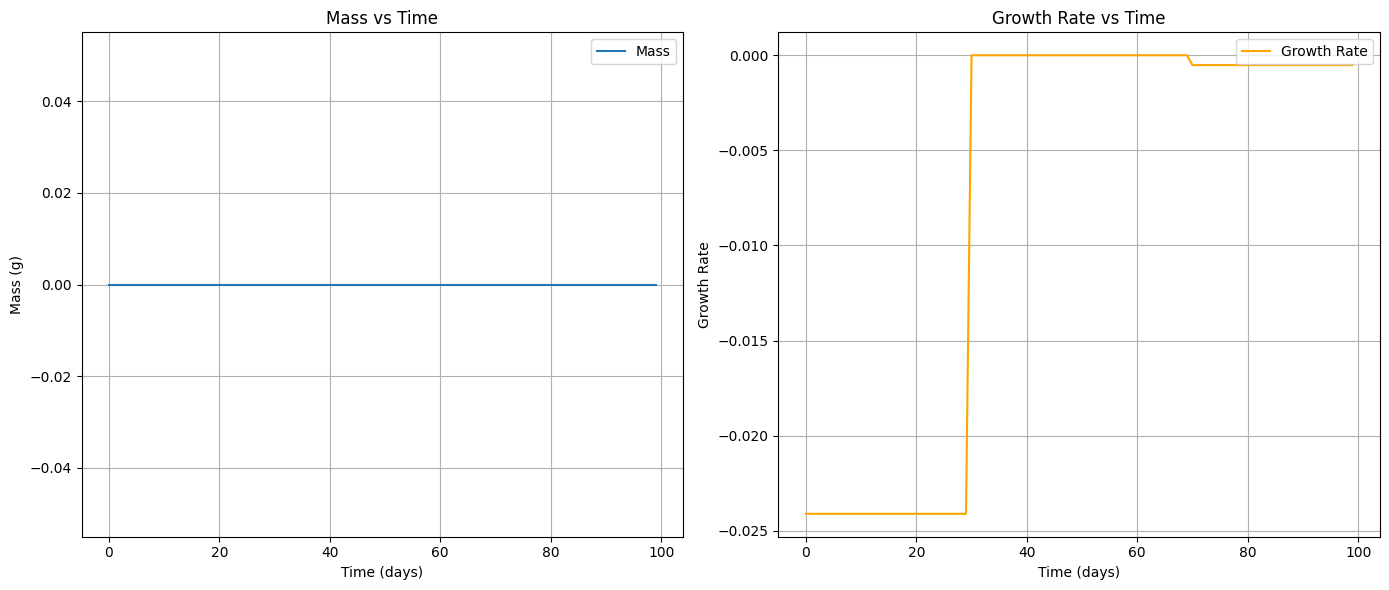

In [11]:
stages_duration = {
    "Germination": 30,
    "Vegetative": 40,
    "Flowering": 30,
}

# Simulate growth
mass_over_time = []
growth_rate_over_time = []
time = []
current_mass = init_m
current_time = 0

for stage, duration in stages_duration.items():
    lux = optimized_conditions[stage]["lux"]
    temp = optimized_conditions[stage]["temp"]
    water = optimized_conditions[stage]["water"]

    for t in range(duration):
        growth_rate = plant_growth_rate(current_mass, lux, temp, water)
        current_mass += max(0, growth_rate)  # Ensure no negative growth

        # Store values
        mass_over_time.append(current_mass)
        growth_rate_over_time.append(growth_rate)
        time.append(current_time)

        current_time += 1

# Plot Mass vs Time
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(time, mass_over_time, label="Mass")
plt.xlabel("Time (days)")
plt.ylabel("Mass (g)")
plt.title("Mass vs Time")
plt.grid()
plt.legend()

# Plot Growth Rate vs Time
plt.subplot(1, 2, 2)
plt.plot(time, growth_rate_over_time, label="Growth Rate", color="orange")
plt.xlabel("Time (days)")
plt.ylabel("Growth Rate")
plt.title("Growth Rate vs Time")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
